# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings 
warnings.filterwarnings(action="ignore")


In [16]:
# Import the libraries you will be using for analysis
import pandas as pd 
import numpy as np # Visualization 

import matplotlib.pyplot as plt 
import seaborn as sns # Extra (Suppress Warnings) 


In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Try loading one file

df = pd.read_parquet(r'C:\Users\danag\Practice\EDA\Assignment21May\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
import time

In [29]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(r'C:\Users\danag\Practice\EDA\Assignment21May\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
date_sample = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(file_path)
        # Reading the current file
        start = time.time()
        df = pd.read_parquet(file_path)
        #print(df.shape)
        # Add date and hour column from trip start date
        df["tpep_pickup_date"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.date
        df["tpep_pickup_hour"] = pd.to_datetime(df["tpep_pickup_datetime"]).dt.hour

        # Take unique values for date to iterate over
        dates = df["tpep_pickup_date"].unique()
        #print(dates)
        for date in dates:
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
            print(f"Processing for {date} ")
            sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        
            # Iterate through each hour of the selected date
            hours = df["tpep_pickup_hour"].unique()
            #print(hours)
            for hour in hours:
                hour_data = pd.DataFrame()
                hour_data = df[(df["tpep_pickup_date"] == date) & (df["tpep_pickup_hour"] == hour)]
                # Sample 5% of the hourly data randomly                                
                sample = hour_data.sample(frac = 0.05, random_state = 42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
                #print(sampled_data.shape)
        # Concatenate the sampled data of all the dates to a single dataframe
            date_sample = pd.concat([date_sample, sampled_data])
            #print(date_sample.shape)
        #df = # we initialised this empty DF earlier
        end = time.time()
        print(f"Total runtime of the program is {end - start} seconds")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

C:\Users\danag\Practice\EDA\Assignment21May\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records\2023-1.parquet
Processing for 2023-01-01 
Processing for 2022-12-31 
Processing for 2022-10-24 
Processing for 2022-10-25 
Processing for 2023-01-02 
Processing for 2023-01-03 
Processing for 2008-12-31 
Processing for 2023-01-04 
Processing for 2023-01-05 
Processing for 2023-01-06 
Processing for 2023-01-07 
Processing for 2023-01-08 
Processing for 2023-01-09 
Processing for 2023-01-10 
Processing for 2023-01-11 
Processing for 2023-01-12 
Processing for 2023-01-13 
Processing for 2023-01-14 
Processing for 2023-01-15 
Processing for 2023-01-16 
Processing for 2023-01-17 
Processing for 2023-01-18 
Processing for 2023-01-19 
Processing for 2023-01-20 
Processing for 2023-01-21 
Processing for 2023-01-22 
Processing for 2023-01-23 
Processing for 2023-01-24 
Processing for 2023-01-25 
Processing for 2023-01-26 
Processing for 2023-01-27 
Processing for 2023-01-28 
Processing f

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [31]:
# Store the df in csv/parquet
# df.to_parquet('')
date_sample.to_parquet(r'C:\Users\danag\Practice\EDA\Assignment21May\Datasets and Dictionary-NYC\Datasets and Dictionary\output.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [34]:
# Load the new data file
df = pd.read_parquet(r'C:\Users\danag\Practice\EDA\Assignment21May\Datasets and Dictionary-NYC\Datasets and Dictionary\output.parquet')

In [118]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-21 13:22:17   2023-01-21 13:35:04              1.0   
2         2  2023-01-21 13:34:20   2023-01-21 13:58:28              2.0   
3         2  2023-01-21 13:18:30   2023-01-21 13:38:35              1.0   
4         2  2023-01-21 13:18:56   2023-01-21 13:24:12              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           2.34         1.0           164           144             1   
2           2.15         1.0           141           230             2   
3           3.33         1.0           100           141             1   
4           0.74         1.0           238           151             1   

   fare_amount  ...  improvement_surcharge  total_amount  \
0         32.4  ...                    1.0         41.15   
1         14.9  ...                    1.0         19.90   
2         21.2  ...                    1.0         25.20   
3         20.5  ...                    1.0         26.00   
4          7.2  ...                    1.0         14.56   

   congestion_surcharge  airport_fee  tpep_pickup_date  tpep_pickup_hour  \
0                   0.0         1.25        2023-01-01                 0   
1                   2.5         0.00        2023-01-21                13   
2                   2.5         0.00        2023-01-21                13   
3                   2.5         0.00        2023-01-21                13   
4                   2.5         0.00        2023-01-21                13   

   tpep_pickup_dayofweek  tpep_pickup_month tpep_pickup_quarter  trip_duration  
0                 Sunday            January              2023Q1             16  
1               Saturday            January              2023Q1             13  
2               Saturday            January              2023Q1             24  
3               Saturday            January              2023Q1             20  
4               Saturday            January              2023Q1              5  

[5 rows x 24 columns]

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1779374 entries, 0 to 1801637
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  tpep_pickup_date       obje

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [39]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   tpep_pickup_date  tpep_pickup_hour Airport_fee  
0        2023-01-01                 0         NaN  
1        2023-01-01                 0         NaN  
2        2023-01-01                 0         NaN  
3        2023-01-01                 0         NaN  
4        2023-01-01                 0         NaN  

[5 rows x 22 columns]

In [40]:
#dropping store_and_fwd_flag column
df.drop(columns=['store_and_fwd_flag'], axis=1, inplace=True)
df.shape

(1896400, 21)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [42]:
# Combine the two airport fee columns
combine_cols = ["airport_fee","Airport_fee"]
df = df.assign(airport_fee=df[combine_cols].sum(1))
df.isna().sum()


VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           64874
trip_distance                 0
RatecodeID                64874
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      64874
airport_fee                   0
tpep_pickup_date              0
tpep_pickup_hour              0
Airport_fee              213357
dtype: int64

In [43]:
# dropping duplicate column Airport_fee
df = df.drop(["Airport_fee"],axis=1)

In [44]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN         0.00   

  tpep_pickup_date  tpep_pickup_hour  
0       2023-01-01                 0  
1       2023-01-01                 0  
2       2023-01-01                 0  
3       2023-01-01                 0  
4       2023-01-01                 0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [46]:
# check where values of fare amount are negative
df[df.fare_amount<0]
# Negative fares records are not existing.

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, tpep_pickup_date, tpep_pickup_hour]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [48]:
# Analyse RatecodeID for the negative fare amounts
df.RatecodeID.unique()
# No entry of negative fares for RatecodeID


array([ 1., nan,  2.,  4.,  5., 99.,  3.,  6.])

In [49]:
# Find which columns have negative values
col_negative = []
for column in df.select_dtypes(include=['float64', 'int64']):
    if (df[column] < 0).any():
        col_negative.append(column)
        
col_negative


['extra',
 'mta_tax',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [50]:
# fix these negative values
df = df[~df[['extra','mta_tax','improvement_surcharge','total_amount','congestion_surcharge','airport_fee']].lt(0).any(axis=1)] 
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN         0.00   

  tpep_pickup_date  tpep_pickup_hour  
0       2023-01-01                 0  
1       2023-01-01                 0  
2       2023-01-01                 0  
3       2023-01-01                 0  
4       2023-01-01                 0

In [51]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4          19.24         NaN            66           107             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        32.40    6.0      0.5        0.00           0.0   
1         7.90    1.0      0.5        2.58           0.0   
2        11.40    1.0      0.5        0.00           0.0   
3         6.50    1.0      0.5        0.00           0.0   
4        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN         0.00   

  tpep_pickup_date  tpep_pickup_hour  
0       2023-01-01                 0  
1       2023-01-01                 0  
2       2023-01-01                 0  
3       2023-01-01                 0  
4       2023-01-01                 0

In [52]:
#Check the negative values columns if any
col_negative = []
for column in df.select_dtypes(include=['float64', 'int64']):
    if (df[column] < 0).any():
        col_negative.append(column)
        
col_negative

[]

In [53]:
df.shape

(1896321, 20)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [56]:
# Find the proportion of missing values in each column
round(df.isna().mean()*100,2)
#the columns RatecodeID , passenger_count, congestion_surcharge have nulls upto 3.42%  

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          3.42
trip_distance            0.00
RatecodeID               3.42
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.42
airport_fee              0.00
tpep_pickup_date         0.00
tpep_pickup_hour         0.00
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [58]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
airport_fee                  0
tpep_pickup_date             0
tpep_pickup_hour             0
dtype: int64

In [59]:
df[df.passenger_count.isna()]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896313         1  2023-09-30 22:47:00   2023-09-30 22:59:51              NaN   
1896345         2  2023-09-30 22:26:44   2023-09-30 22:39:41              NaN   
1896356         1  2023-09-30 22:07:52   2023-09-30 22:13:26              NaN   
1896368         2  2023-09-30 22:50:39   2023-09-30 22:56:04              NaN   
1896397         2  2023-09-30 22:35:50   2023-09-30 22:43:17              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
4                19.24         NaN            66           107             0   
15               10.77         NaN           151           106             0   
42                4.52         NaN           114           262             0   
43                9.19         NaN           239           256             0   
46                2.74         NaN            90            48             0   
...                ...         ...           ...           ...           ...   
1896313           0.00         NaN            68           170             0   
1896345           2.32         NaN           239            50             0   
1896356           0.00         NaN           238           238             0   
1896368           0.59         NaN           142            48             0   
1896397           1.38         NaN            50            68             0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4              25.64    0.0      0.5        5.93          0.00   
15             45.38    0.0      0.5       11.19          6.55   
42             25.38    0.0      0.5        0.00          0.00   
43             40.00    0.0      0.5        2.20          0.00   
46             18.48    0.0      0.5        3.37          0.00   
...              ...    ...      ...         ...           ...   
1896313        17.91    0.0      0.5        0.00          0.00   
1896345        15.93    0.0      0.5        2.00          0.00   
1896356         7.83    0.0      0.5        0.00          0.00   
1896368        16.32    0.0      0.5        3.70          0.00   
1896397        14.48    0.0      0.5        3.70          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
4                          1.0         35.57                   NaN   
15                         1.0         67.12                   NaN   
42                         1.0         29.38                   NaN   
43                         1.0         46.20                   NaN   
46                         1.0         25.85                   NaN   
...                        ...           ...                   ...   
1896313                    1.0         21.91                   NaN   
1896345                    1.0         21.93                   NaN   
1896356                    1.0         11.83                   NaN   
1896368                    1.0         24.02                   NaN   
1896397                    1.0         22.18                   NaN   

         airport_fee tpep_pickup_date  tpep_pickup_hour  
4                0.0       2023-01-01                 0  
15               0.0       2023-01-01                 0  
42               0.0       2023-01-01                 0  
43               0.0       2023-01-01                 0  
46               0.0       2023-01-01                 0  
...              ...              ...               ...  
1896313          0.0       2023-09-

In [60]:
median_value = df['passenger_count'].median()
df['passenger_count'].fillna(median_value, inplace=True)
# Impute NaN values in 'passenger_count' - replace with median

Did you find zeroes in passenger_count? Handle these.

In [62]:
# Remove the rows with passenger_count as 0
df = df[df.passenger_count != 0]
df.shape

(1866640, 20)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [64]:
# Fix missing values in 'RatecodeID'
df.RatecodeID.isna().sum()

64874

In [65]:
# Replace zeros in RatecodeID with Mode value
mode_value = df.RatecodeID.mode()[0]
df.RatecodeID.fillna(mode_value, inplace=True)
df.RatecodeID.isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [67]:
# handle null values in congestion_surcharge
# Replace with Mode value
mode_value = df.congestion_surcharge.mode()[0]
df.congestion_surcharge.fillna(mode_value, inplace=True)
df.congestion_surcharge.isna().sum()


0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [69]:
# Handle any remaining missing values

df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
tpep_pickup_date         0
tpep_pickup_hour         0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [72]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.866640e+06                     1866640                     1866640   
mean   1.744619e+00  2023-07-02 23:54:35.156987  2023-07-03 00:12:03.801033   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 18:11:20.500000  2023-04-02 18:29:17.750000   
50%    2.000000e+00         2023-06-27 19:32:38         2023-06-27 19:46:11   
75%    2.000000e+00  2023-10-06 23:37:18.750000  2023-10-06 23:54:43.750000   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.414960e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.866640e+06   1.866640e+06  1.866640e+06  1.866640e+06   
mean      1.378150e+00   3.875038e+00  1.619864e+00  1.652480e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.410000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.699587e-01   1.304351e+02  7.312306e+00  6.400130e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.866640e+06  1.866640e+06  1.866640e+06  1.866640e+06  1.866640e+06   
mean   1.640227e+02  1.162249e+00  1.996235e+01  1.561189e+00  4.953202e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.229000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.981914e+01  5.076060e-01  1.063548e+02  1.820560e+00  4.840724e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.866640e+06  1.866640e+06           1.866640e+06  1.866640e+06   
mean   3.555335e+00  5.998000e-01           9.990698e-01  2.903906e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.108000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.100000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.056998e+00  2.193114e+00           2.804540e-02  1.072306e+02   

       congestion_surcharge   airport_fee  tpep_pickup_hour  
count          1.866640e+06  1.866640e+06      1.866640e+06  
mean           2.314224e+00  1.387575e-01      1.426855e+01  
min            0.000000e+00  0.000000e+00      0.000000e+00  
25%            2.500000e+00  0.000000e+00      1.100000e+01  
50%            2.500000e+00  0.000000e+00      1.500000e+01  
75%            2.500000e+00  0.000000e+00      1.900000e+01  
max            2.500000e+00  1.750000e+00      2.300000e+01  
std            6.556882e-01  4.586835e-01      5.814620e+00

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [76]:
# remove passenger_count > 6
df.passenger_count.value_counts()

passenger_count
1.0    1442042
2.0     277283
3.0      69032
4.0      38532
5.0      23871
6.0      15859
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

In [77]:
df = df[df['passenger_count']<=6]
df.shape

(1866619, 20)

In [78]:
# Continue with outlier handling
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]
df.reset_index(drop=True, inplace=True)
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4           7.10         1.0           246            37             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         32.4    6.0      0.5        0.00           0.0   
1          7.9    1.0      0.5        2.58           0.0   
2         11.4    1.0      0.5        0.00           0.0   
3          6.5    1.0      0.5        0.00           0.0   
4         34.5    3.5      0.5        7.90           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         47.40                   2.5         0.00   

  tpep_pickup_date  tpep_pickup_hour  
0       2023-01-01                 0  
1       2023-01-01                 0  
2       2023-01-01                 0  
3       2023-01-01                 0  
4       2023-01-01                 0

In [79]:
# Additional outlier handling
# Fare greater than 5000
df = df[df['fare_amount'] <= 5000]

In [80]:
df.describe(include=[np.number]).T

count        mean        std  min     25%     50%  \
VendorID               1801638.0    1.748391   0.433938  1.0    1.00    2.00   
passenger_count        1801638.0    1.391693   0.882183  1.0    1.00    1.00   
trip_distance          1801638.0    3.455344   4.555464  0.0    1.06    1.79   
RatecodeID             1801638.0    1.641639   7.439228  1.0    1.00    1.00   
PULocationID           1801638.0  165.427383  63.668096  1.0  132.00  162.00   
DOLocationID           1801638.0  164.308579  69.756813  1.0  114.00  162.00   
payment_type           1801638.0    1.204060   0.465276  1.0    1.00    1.00   
fare_amount            1801638.0   19.780466  18.294097  0.0    9.30   13.50   
extra                  1801638.0    1.611319   1.828072  0.0    0.00    1.00   
mta_tax                1801638.0    0.495366   0.048185  0.0    0.50    0.50   
tip_amount             1801638.0    3.582576   4.071801  0.0    1.00    2.86   
tolls_amount           1801638.0    0.599182   2.189164  0.0    0.00    0.00   
improvement_surcharge  1801638.0    0.999346   0.023668  0.0    1.00    1.00   
total_amount           1801638.0   28.919537  22.922434  0.0   15.96   21.00   
congestion_surcharge   1801638.0    2.307664   0.666218  0.0    2.50    2.50   
airport_fee            1801638.0    0.143752   0.466096  0.0    0.00    0.00   
tpep_pickup_hour       1801638.0   14.299546   5.783986  0.0   11.00   15.00   

                          75%      max  
VendorID                 2.00     2.00  
passenger_count          1.00     6.00  
trip_distance            3.39   204.86  
RatecodeID               1.00    99.00  
PULocationID           234.00   265.00  
DOLocationID           234.00   265.00  
payment_type             1.00     4.00  
fare_amount             21.90  1375.00  
extra                    2.50    14.25  
mta_tax                  0.50     4.00  
tip_amount               4.45   223.08  
tolls_amount             0.00   143.00  
improvement_surcharge    1.00     1.00  
total_amount            30.72  1435.19  
congestion_surcharge     2.50     2.50  
airport_fee              0.00     1.75  
tpep_pickup_hour        19.00    23.00

In [81]:
# Do any columns need standardising?

#No, all columns are good

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [83]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'tpep_pickup_date',
 'tpep_pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Categorical
* `tpep_dropoff_datetime`:Categorical
* `passenger_count`:Categorical
* `trip_distance`:Categorical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Categorical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

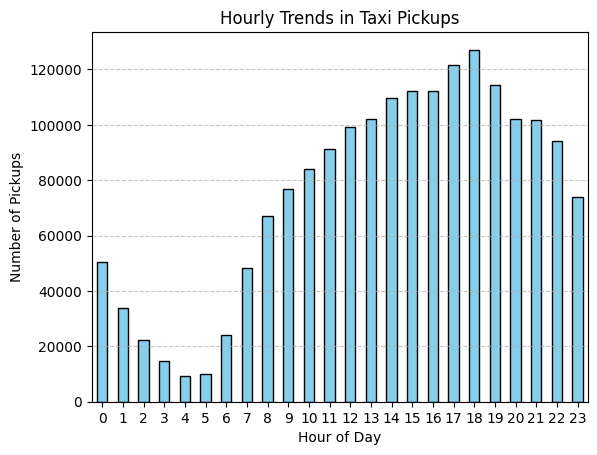

In [87]:
# Find and show the hourly trends in taxi pickups
df['tpep_pickup_hour'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
#highest during 5-7PM, lowest during 4-6AM


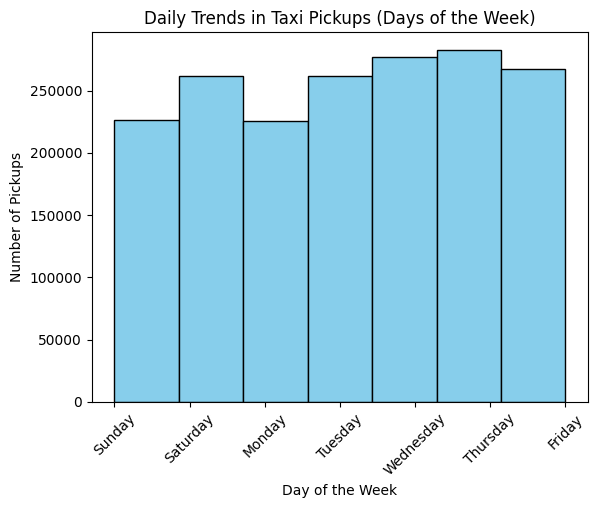

In [88]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_dayofweek'] = df.tpep_pickup_datetime.dt.day_name()
plt.hist(df.tpep_pickup_dayofweek, bins=7, edgecolor='black',color='skyblue')
plt.title('Daily Trends in Taxi Pickups (Days of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show() 
# Most days show similar pickup volumes. However, Sunday and Monday are slightly lower, while Wednesday and Thursday see a modest increase.

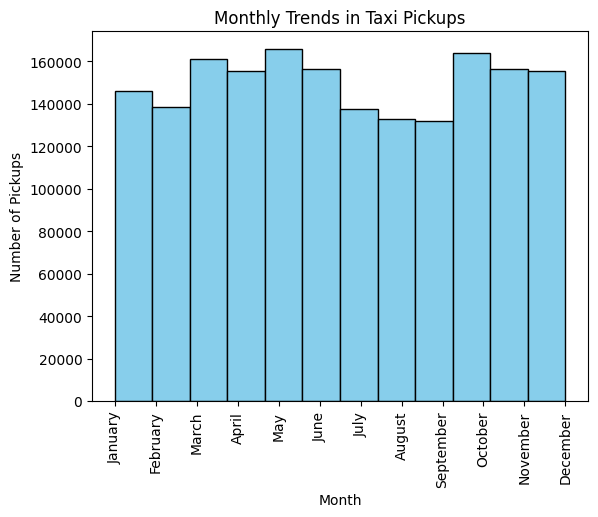

In [89]:
# Show the monthly trends in pickups
# Add Month of the year
df['tpep_pickup_month'] = df.tpep_pickup_datetime.dt.month_name()
#sort month
Order_month  = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df.index=pd.CategoricalIndex(df.tpep_pickup_month,categories=Order_month,ordered=True)
df = df.sort_index().reset_index(drop=True)
#plot monthky trends
plt.hist(df.tpep_pickup_month, bins=12, edgecolor='black',color='skyblue')
plt.xticks(rotation=90)
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show() 
# Most months show similar pickup volumes. However, August and September are slightly lower, while May and October see a modest increase.

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [92]:
# Analyse the above parameters
#check if any of the columns have negative values
col_negative = []
for column in df.select_dtypes(include=['float64', 'int64']):
    if (df[column] < 0).any():
        col_negative.append(column)
        
col_negative


[]

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [94]:
# check zero values
col_zeros = []
for column in df.select_dtypes(include=['float64', 'int64']):
    if (df[column] == 0).any():
        col_zeros.append(column)
        
col_zeros

['trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [95]:
#There are zero values in some of the columns, but no issue with columns like extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, congestion_surcharge, airport_fee
# the columns trip_distance, fare_amount,total_amount are important in data analysis and hence should not contain zeros.




In [96]:
df[df.trip_distance == 0]
df[df.fare_amount == 0]
df[df.total_amount == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
13638           1  2023-01-24 17:19:45   2023-01-24 17:20:10              1.0   
15643           1  2023-01-22 12:33:16   2023-01-22 12:33:24              1.0   
17358           1  2023-01-23 15:06:45   2023-01-23 15:09:16              1.0   
20277           1  2023-01-18 15:00:28   2023-01-18 15:00:40              1.0   
39495           1  2023-01-29 16:39:13   2023-01-29 16:40:24              1.0   
...           ...                  ...                   ...              ...   
1782929         1  2023-12-08 21:19:17   2023-12-08 21:19:30              1.0   
1788332         1  2023-12-07 20:56:37   2023-12-07 20:57:22              1.0   
1789847         1  2023-12-08 12:02:15   2023-12-08 12:04:54              1.0   
1795046         1  2023-12-11 07:25:55   2023-12-11 07:30:28              1.0   
1795125         1  2023-12-11 08:39:46   2023-12-11 08:47:04              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
13638              0.1         1.0            43           151             3   
15643              0.0         1.0           145           145             2   
17358              0.0         1.0           132           132             3   
20277              0.0         1.0           145           145             2   
39495              0.0         1.0            50            50             2   
...                ...         ...           ...           ...           ...   
1782929            0.0         1.0            87            87             3   
1788332            0.0         1.0           151           151             3   
1789847            0.1         1.0           236           237             3   
1795046            0.7         1.0            48           163             4   
1795125            0.6         1.0           231           231             4   

         fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
13638            0.0  ...         0.0           0.0                    0.0   
15643            0.0  ...         0.0           0.0                    0.0   
17358            0.0  ...         0.0           0.0                    0.0   
20277            0.0  ...         0.0           0.0                    0.0   
39495            0.0  ...         0.0           0.0                    0.0   
...              ...  ...         ...           ...                    ...   
1782929          0.0  ...         0.0           0.0                    0.0   
1788332          0.0  ...         0.0           0.0                    0.0   
1789847          0.0  ...         0.0           0.0                    0.0   
1795046          0.0  ...         0.0           0.0                    0.0   
1795125          0.0  ...         0.0           0.0                    0.0   

         total_amount  congestion_surcharge  airport_fee  tpep_pickup_date  \
13638             0.0                   0.0          0.0        2023-01-24   
15643             0.0                   0.0          0.0        2023-01-22   
17358             0.0                   0.0          0.0        2023-01-23   
20277             0.0                   0.0          0.0        2023-01-18   
39495             0.0                   0.0          0.0        2023-01-29   
...               ...                   ...          ...               ...   
1782929           0.0                   0.0          0.0        2023-12-08   
1788332           0.0                   0.0          0.0        2023-12-07   
1789847           0.0                   0.0          0.0        2023-12-08   
1795046           0.0                   0.0          0.0        2023-12-11   
1795125           0.0                   0.0          0.0        2023-12-11   

         tpep_pickup_hour tpep_pickup_dayofweek  tpep_pickup_month  
13638                  17               Tuesday            January  
15643                  12                Sunday            Janu

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [98]:
# Create a df with non zero entries for the selected parameters.
#creating  a copy Dataframe with non zero values for columns trip_distance, fare_amount,total_amount.
df = df[~(df.trip_distance == 0)]
df = df[~(df.fare_amount == 0)]
df = df[~(df.total_amount == 0)]



In [99]:
df.shape

(1779374, 22)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

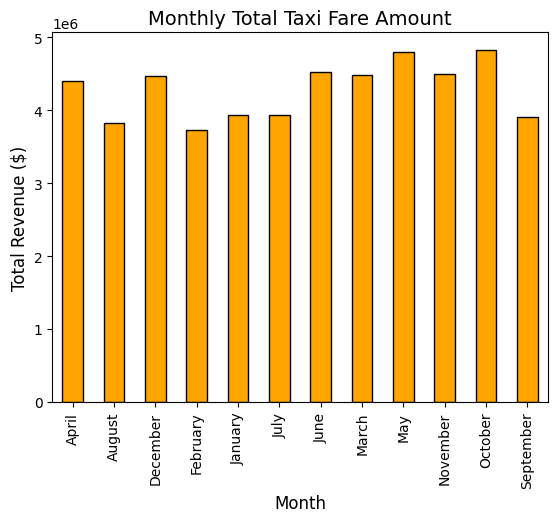

In [101]:
# Group data by month and analyse monthly revenue
df.groupby('tpep_pickup_month')['total_amount'].sum().plot(kind='bar', color='orange', edgecolor='black')
plt.title('Monthly Total Taxi Fare Amount', fontsize=14)
plt.xlabel('Month',fontsize=12)
plt.ylabel('Total Revenue ($)',fontsize=12)
plt.xticks(rotation=90)
plt.show()
#Insight: Most months exhibit similar total revenues. February and August are slightly lower, whereas October and May show modestly higher values.


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [103]:
# Calculate proportion of each quarter
#df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
#df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
#revenue_by_quarter = df.groupby('quarter')['total_amount'].sum().reset_index()
#proportion_by_quarter = (revenue_by_quarter / revenue_by_quarter.sum()).round(2) * 100
#proportion_by_quarter.head()
df['tpep_pickup_quarter'] = df['tpep_pickup_datetime'].dt.to_period('Q')
revenue_quarterly = df.groupby('tpep_pickup_quarter')['total_amount'].sum().reset_index()
total_yearly_revenue = revenue_quarterly['total_amount'].sum()
revenue_quarterly['proportion'] = round((revenue_quarterly['total_amount'] / total_yearly_revenue),2)
revenue_quarterly.head()

tpep_pickup_quarter  total_amount  proportion
0              2022Q4         13.50        0.00
1              2023Q1   12142099.41        0.24
2              2023Q2   13716752.93        0.27
3              2023Q3   11665120.84        0.23
4              2023Q4   13795646.41        0.27

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

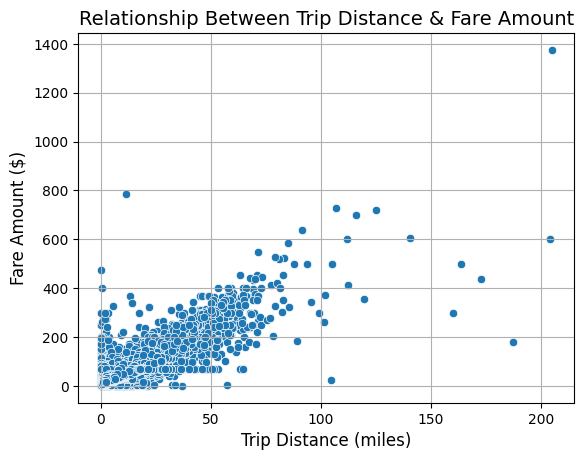

In [105]:
# Show how trip fare is affected by distance
sns.scatterplot(x=df.trip_distance, y=df.fare_amount)
plt.title('Relationship Between Trip Distance & Fare Amount', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(True)
plt.show()

    #As trip distance increases, fare amounts tend to rise. However, the variability in fares also becomes more pronounced with longer trips.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

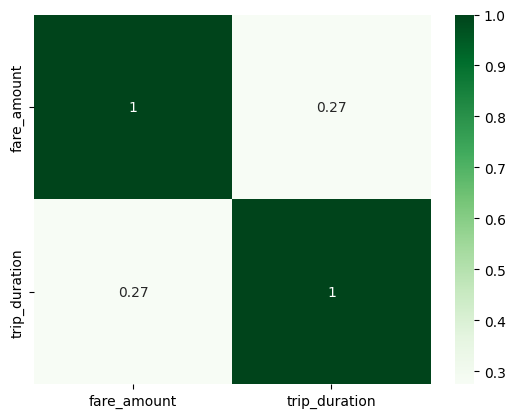

In [107]:
# Show relationship between fare and trip duration
#column for trip duration
df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.total_seconds().div(60).round(0).astype(int)
#plotting relationship between fare and duration
sns.heatmap(df[['fare_amount','trip_duration']].corr(),cmap='Greens',annot=True)
plt.show()



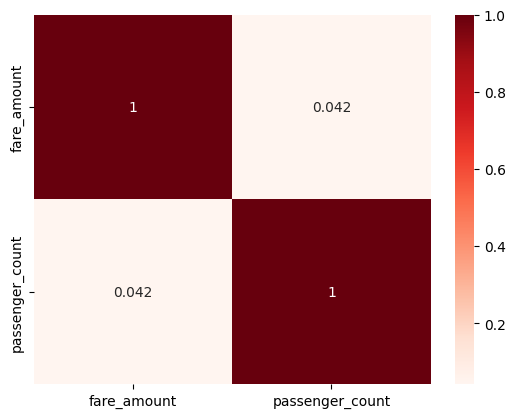

In [108]:
# Show relationship between fare and number of passengers
sns.heatmap(df[['fare_amount','passenger_count']].corr(),cmap='Reds',annot=True)
plt.show()


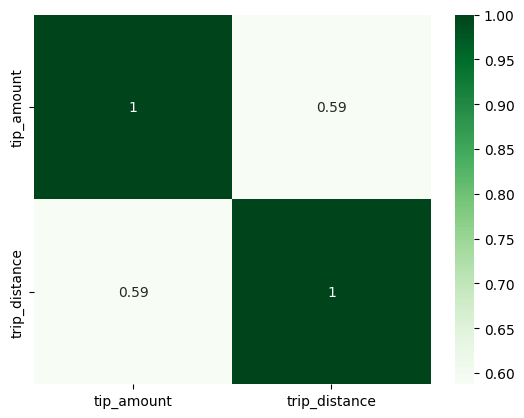

In [109]:
# Show relationship between tip and trip distance

sns.heatmap(df[['tip_amount','trip_distance']].corr(),cmap='Greens',annot=True)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [111]:
# Analyse the distribution of different payment types (payment_type)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [116]:
# !pip install geopandas

In [124]:
# Importing Geopandas
!pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
    --------------------------------------- 0.3/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/19.2 MB 2.1 MB/s eta 0:00:09
   -- ------------------------------------- 1.0/19.2 MB 1.9 MB/s eta 0:00:10
   --- ------------------------------------ 1.6/19.2 MB 2.0 MB/s eta 0:00:09
   ---- ----------------------------------- 2.1/19.2 MB 2.0 MB/s eta 0:00:09
   ----- ---------------------------------- 2.6/19.2 MB 2.2 MB/s eta 0:00:08
   ------- -------------------------------- 3.7/19.2 MB 2.6 MB/s eta 0:00:07
   --------- ------------------------------ 4.7/19.2 MB 2.9 MB/s eta 0:00:05
   ------------ --------------------------- 6.0/19.2 MB 3.3 MB/s eta 0:00:05
   -------------- ------------------------- 7.1/19.2 MB 3.5 MB/s eta 0:00:04
   ----------------- ---------------------- 8.4/19.2 MB 3.7 MB/s eta 0:00:03
   -------------------- ------------------- 9.7/19.2 MB 3.9 MB/s eta 0:00:03
   ----------

In [129]:
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [131]:
# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\danag\Practice\EDA\Assignment21May\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')# read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [133]:
print(zones.info())


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

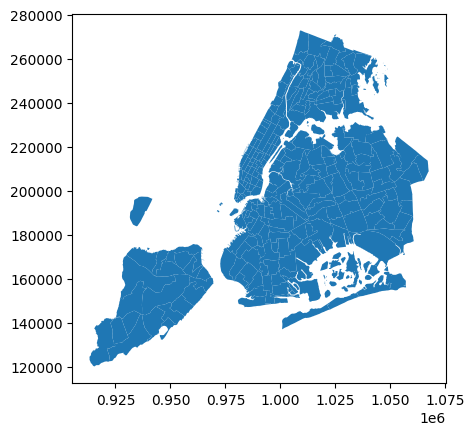

In [135]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [137]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(df,zones,how='inner',left_on='PULocationID',right_on='LocationID')
merged_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-21 13:22:17   2023-01-21 13:35:04              1.0   
2         2  2023-01-21 13:34:20   2023-01-21 13:58:28              2.0   
3         2  2023-01-21 13:18:30   2023-01-21 13:38:35              1.0   
4         2  2023-01-21 13:18:56   2023-01-21 13:24:12              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           2.34         1.0           164           144             1   
2           2.15         1.0           141           230             2   
3           3.33         1.0           100           141             1   
4           0.74         1.0           238           151             1   

   fare_amount  ...  tpep_pickup_month  tpep_pickup_quarter  trip_duration  \
0         32.4  ...            January               2023Q1             16   
1         14.9  ...            January               2023Q1             13   
2         21.2  ...            January               2023Q1             24   
3         20.5  ...            January               2023Q1             20   
4          7.2  ...            January               2023Q1              5   

   OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
0       138    0.107467    0.000537      LaGuardia Airport         138   
1       164    0.035772    0.000056          Midtown South         164   
2       141    0.041514    0.000077        Lenox Hill West         141   
3       100    0.024813    0.000037       Garment District         100   
4       238    0.060109    0.000185  Upper West Side North         238   

     borough                                           geometry  
0     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...  
1  Manhattan  POLYGON ((988787.425 210315.593, 988662.868 21...  
2  Manhattan  POLYGON ((994839.073 216123.698, 994786.74 216...  
3  Manhattan  POLYGON ((987770.527 212686.678, 987638.873 21...  
4  Manhattan  POLYGON ((992877.88 225627.534, 992741.735 225...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [143]:
# Group data by location and calculate the number of trips
aggregated_data = merged_df.groupby(['LocationID']).agg(
    trips=('LocationID', 'count')
)

print(aggregated_data)



            trips
LocationID       
1              47
2               2
3              31
4            1776
5               9
...           ...
259            35
260           299
261          9371
262         23126
263         34096

[251 rows x 1 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [145]:
# Merge trip counts back to the zones GeoDataFrame
merged_df1 = pd.merge(zones,aggregated_data,how='left',on='LocationID')
merged_df1.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry   trips  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...    47.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...     2.0  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...    31.0  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  1776.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...     9.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

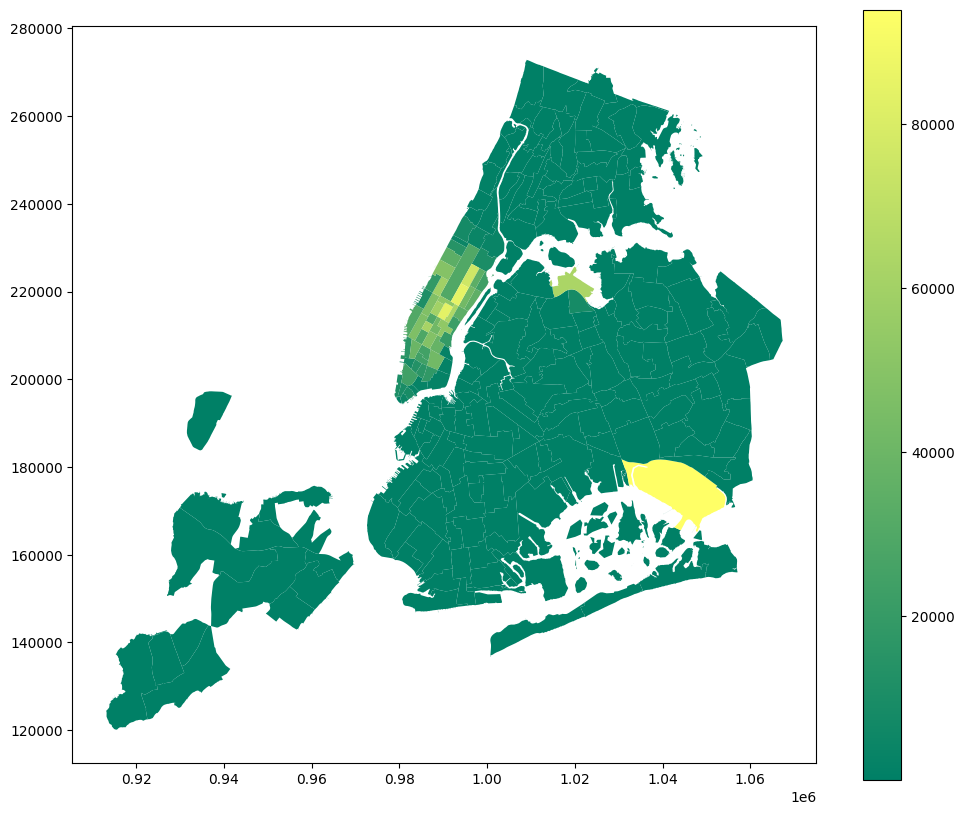

In [147]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
merged_df1.plot(ax = ax,legend = True,column='trips',cmap='summer')
plt.show()



In [149]:
# can you try displaying the zones DF sorted by the number of trips?
merged_df1_sorted = merged_df1.sort_values(by='trips',ascending=False)
merged_df1_sorted.head()


OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   

       borough                                           geometry    trips  
131     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...  93985.0  
236  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...  85003.0  
160  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...  83988.0  
235  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...  75707.0  
161  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...  64177.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [153]:
# Find routes which have the slowest speeds at different times of the day

df['avg_trip_duration_per_hr']=df.groupby('tpep_pickup_hour')['trip_duration'].transform('mean')
df['route_speedz'] = round((df['trip_distance']/df['avg_trip_duration_per_hr']),5)
df_sorted = df.sort_values(by='route_speedz')
df_sorted.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1739100         2  2023-12-06 16:27:25   2023-12-06 16:27:41              2.0   
197660          2  2023-02-02 16:31:07   2023-02-02 16:32:07              3.0   
1730912         2  2023-12-04 16:43:03   2023-12-04 17:14:28              1.0   
9621            2  2023-01-23 16:38:27   2023-01-23 16:38:40              2.0   
1375782         2  2023-10-05 16:26:10   2023-10-05 16:26:22              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1739100           0.01         5.0           132           132             1   
197660            0.01         1.0           100           161             4   
1730912           0.01         2.0           132           132             2   
9621              0.01         5.0           264           161             1   
1375782           0.01         5.0           132           132             1   

         fare_amount  ...  congestion_surcharge  airport_fee  \
1739100         87.0  ...                   0.0         1.75   
197660           3.0  ...                   2.5         0.00   
1730912         70.0  ...                   0.0         1.75   
9621            92.0  ...                   0.0         0.00   
1375782         85.0  ...                   0.0         1.75   

         tpep_pickup_date  tpep_pickup_hour  tpep_pickup_dayofweek  \
1739100        2023-12-06                16              Wednesday   
197660         2023-02-02                16               Thursday   
1730912        2023-12-04                16                 Monday   
9621           2023-01-23                16                 Monday   
1375782        2023-10-05                16               Thursday   

         tpep_pickup_month  tpep_pickup_quarter  trip_duration  \
1739100           December               2023Q4              0   
197660            February               2023Q1              1   
1730912           December               2023Q4             31   
9621               January               2023Q1              0   
1375782            October               2023Q4              0   

        avg_trip_duration_per_hr  route_speedz  
1739100                 20.68992       0.00048  
197660                  20.68992       0.00048  
1730912                 20.68992       0.00048  
9621                    20.68992       0.00048  
1375782                 20.68992       0.00048  

[5 rows x 26 columns]

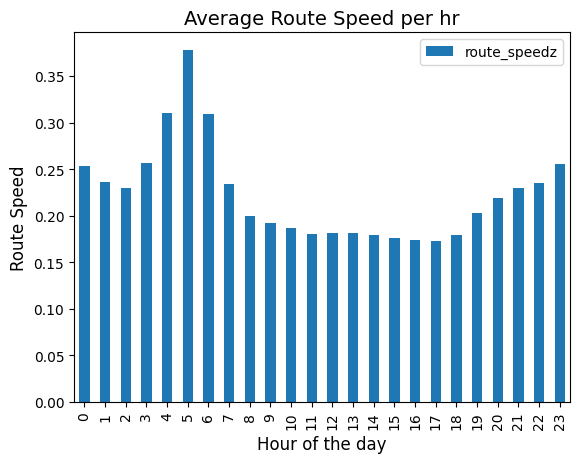

In [156]:
hour_route_speed = df.groupby(['tpep_pickup_hour']).agg(
    route_speedz=('route_speedz', 'mean')
)

hour_route_speed.plot.bar()
plt.title('Average Route Speed per hr', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Route Speed', fontsize=12)
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

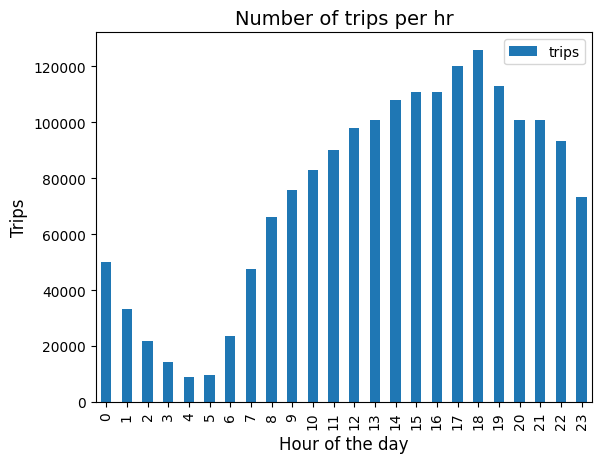

In [158]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hr = df.groupby(['tpep_pickup_hour']).agg(
    trips=('tpep_pickup_hour', 'count')
)
trips_per_hr.plot.bar()
plt.title('Number of trips per hr', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Trips', fontsize=12)
plt.show()


In [160]:
#Find the busiest hour and show the number of trips for that hour.
busiest_hr = trips_per_hr.idxmax(axis=0,numeric_only=True)[0]
busiest_hr_cnt = trips_per_hr.max(axis=0,numeric_only=True)[0]

print(f"The busiest hour is {busiest_hr} with {busiest_hr_cnt} trips.")

The busiest hour is 18 with 125846 trips.


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

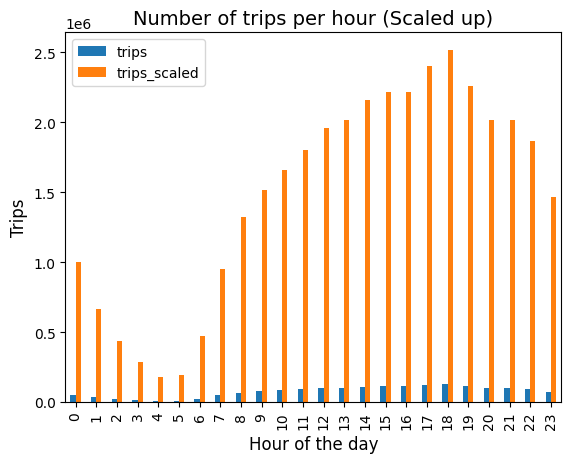

In [162]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trips_per_hr['trips_scaled'] = trips_per_hr.trips/sample_fraction

trips_per_hr.plot.bar()
plt.title('Number of trips per hour (Scaled up)', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Trips', fontsize=12)
plt.show()



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

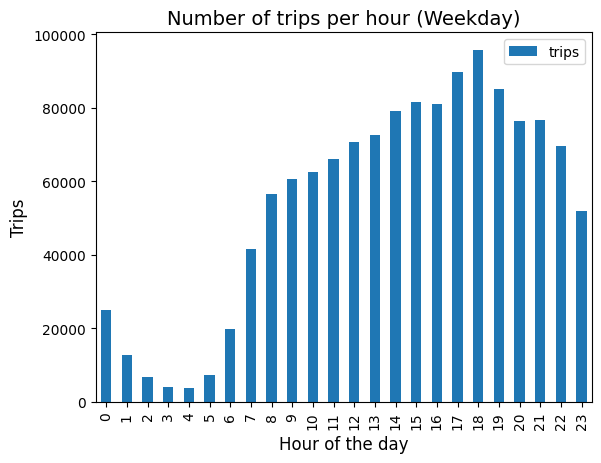

In [164]:
# Compare traffic trends for the week days and weekends
#weekdays
df[~(df.tpep_pickup_dayofweek.isin(['Sunday','Saturday']))].groupby(['tpep_pickup_hour']).agg(
    trips=('tpep_pickup_hour', 'count')
).plot.bar()

plt.title('Number of trips per hour (Weekday)', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Trips', fontsize=12)
plt.show()


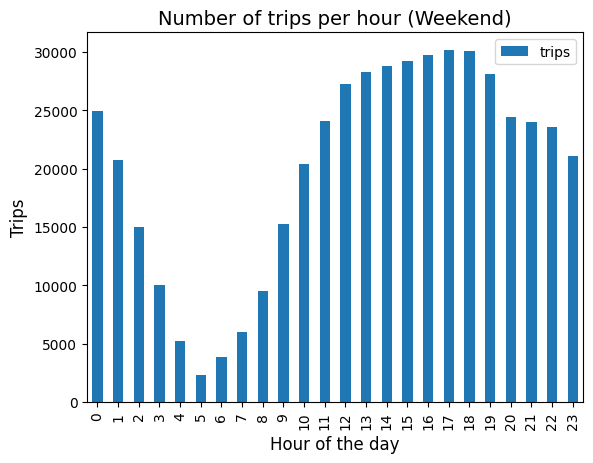

In [166]:
#weekends
df[df.tpep_pickup_dayofweek.isin(['Sunday','Saturday'])].groupby(['tpep_pickup_hour']).agg(
    trips=('tpep_pickup_hour', 'count')
).plot.bar()

plt.title('Number of trips per hour (Weekend)', fontsize=14)
plt.xlabel('Hour of the day', fontsize=12)
plt.ylabel('Trips', fontsize=12)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [168]:
# Find top 10 pickup and dropoff zones

zone_hour_pickup = merged_df.groupby(['zone','tpep_pickup_hour']).agg(
    trips=('zone', 'count')
)

zone_hour_pickup_sorted = zone_hour_pickup.sort_values(by='trips',ascending=False)
zone_hour_pickup_sorted.reset_index(inplace=True)
zone_hour_pickup_sorted.head(10)

zone  tpep_pickup_hour  trips
0         Midtown Center                18   7297
1         Midtown Center                17   7020
2            JFK Airport                22   6556
3            JFK Airport                16   6549
4            JFK Airport                15   6518
5         Midtown Center                16   6506
6  Upper East Side South                18   6451
7  Upper East Side South                17   6445
8  Upper East Side South                14   6437
9  Upper East Side South                15   6405

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [170]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
merged_df["tpep_dropoff_hour"] = pd.to_datetime(merged_df["tpep_dropoff_datetime"]).dt.hour
merged_df2 = pd.merge(merged_df,zones,how='inner',left_on='DOLocationID',right_on='LocationID')

total_trips = merged_df2.shape[0]
zone_drop = merged_df2.groupby(['zone_y']).agg(
    trips_d=('zone_y', 'count')
)
zone_drop['ratio_d']=round((zone_drop.trips_d/total_trips),6)
zone_drop.reset_index(inplace=True)
zone_drop.head(10)


zone_y  trips_d   ratio_d
0  Allerton/Pelham Gardens      146  0.000083
1            Alphabet City     6685  0.003813
2            Arden Heights       30  0.000017
3  Arrochar/Fort Wadsworth       60  0.000034
4                  Astoria     5027  0.002867
5             Astoria Park       38  0.000022
6               Auburndale      189  0.000108
7             Baisley Park     1732  0.000988
8               Bath Beach      129  0.000074
9             Battery Park     1003  0.000572

In [172]:
zone_pick = merged_df2.groupby(['zone_x']).agg(
    trips_p=('zone_x', 'count')
)
zone_pick['ratio_p']=round((zone_pick.trips_p/total_trips),6)
zone_pick.reset_index(inplace=True)
zone_pick.head(10)

zone_x  trips_p   ratio_p
0  Allerton/Pelham Gardens       31  0.000018
1            Alphabet City     1770  0.001010
2            Arden Heights        9  0.000005
3  Arrochar/Fort Wadsworth       21  0.000012
4                  Astoria      726  0.000414
5             Astoria Park        4  0.000002
6               Auburndale       23  0.000013
7             Baisley Park      500  0.000285
8               Bath Beach       23  0.000013
9             Battery Park      796  0.000454

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [174]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
zone_hour_pickup_sorted.reset_index(inplace=True)
zone_hour_pickup_sorted[zone_hour_pickup_sorted.tpep_pickup_hour.isin([23,0,1,2,3,4])].head(10)


index                       zone  tpep_pickup_hour  trips
17      17                JFK Airport                23   6036
78      78                JFK Airport                 0   3844
80      80          LaGuardia Airport                23   3806
107    107               East Village                23   3518
110    110               East Village                 0   3493
123    123               West Village                23   3383
143    143               East Village                 1   3207
156    156  Times Sq/Theatre District                23   3077
163    163               West Village                 0   3034
166    166               Clinton East                23   2996

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [178]:
# Filter for night hours (11 PM to 5 AM)
df_nighttime = df[df.tpep_pickup_hour.isin([23,0,1,2,3,4])]
df_daytime = df[~(df.tpep_pickup_hour.isin([23,0,1,2,3,4]))]

total_revenue = round(df['total_amount'].sum(),2)
nighttime_revenue = round(df_nighttime['total_amount'].sum(),2)
daytime_revenue = round(df_daytime['total_amount'].sum(),2)

print(f"NightTime Revenue = {nighttime_revenue} \nDayTime Revenue = {daytime_revenue} \nTotal Revenue = {total_revenue}" )
night_revenue_share = round(100* nighttime_revenue / total_revenue,2)
datyime_revenue_share = round(100* daytime_revenue / total_revenue,2)

print(f"NightTime Revenue Share is {night_revenue_share} %" )
print(f"DayTime Revenue Share is {datyime_revenue_share} %" )



NightTime Revenue = 5809912.4 
DayTime Revenue = 45509720.69 
Total Revenue = 51319633.09
NightTime Revenue Share is 11.32 %
DayTime Revenue Share is 88.68 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

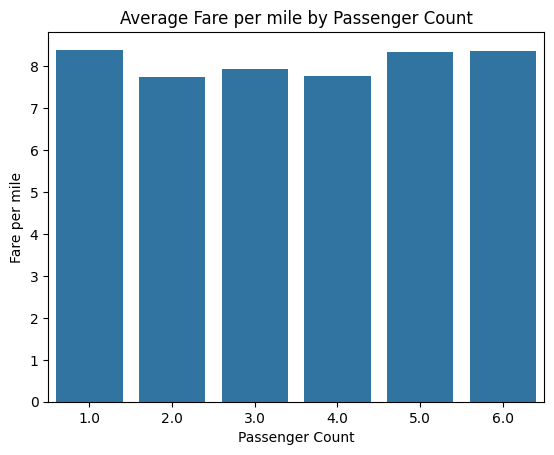

In [186]:
# Analyse the fare per mile per passenger for different passenger counts

passenger_fare = df.groupby(['passenger_count']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

passenger_fare['fare_per_mile']=round((passenger_fare.avg_amount)/(passenger_fare.avg_distance),2)

sns.barplot(data=passenger_fare, x='passenger_count', y='fare_per_mile')
plt.title('Average Fare per mile by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per mile')
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

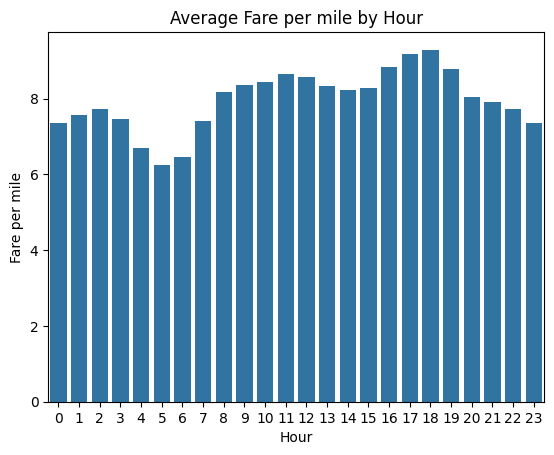

In [188]:
# Compare the average fare per mile for different days and for different times of the day

hourly_fare = df.groupby(['tpep_pickup_hour']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

hourly_fare['fare_per_mile']=round((hourly_fare.avg_amount)/(hourly_fare.avg_distance),2)

sns.barplot(data=hourly_fare, x='tpep_pickup_hour', y='fare_per_mile')
plt.title('Average Fare per mile by Hour')
plt.xlabel('Hour')
plt.ylabel('Fare per mile')
plt.show()


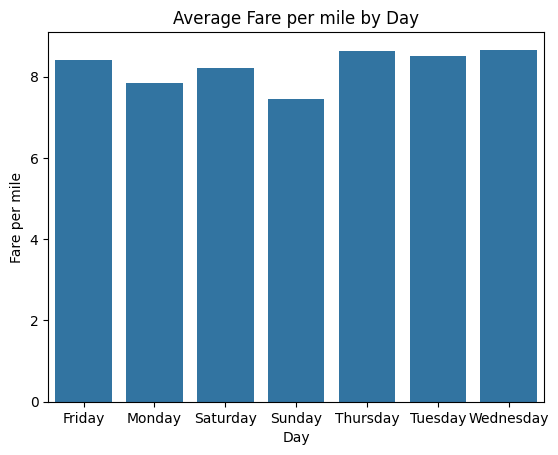

In [190]:
daily_fare = df.groupby(['tpep_pickup_dayofweek']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

daily_fare['fare_per_mile']=round((daily_fare.avg_amount)/(daily_fare.avg_distance),2)

sns.barplot(data=daily_fare, x='tpep_pickup_dayofweek', y='fare_per_mile')
plt.title('Average Fare per mile by Day')
plt.xlabel('Day')
plt.ylabel('Fare per mile')
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [192]:
# Compare fare per mile for different vendors

vendor_hourly_fare = df.groupby(['VendorID','tpep_pickup_hour']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

vendor_hourly_fare['fare_per_mile']=round((vendor_hourly_fare.avg_amount)/(vendor_hourly_fare.avg_distance),2)
vendor_hourly_fare.reset_index(inplace=True)
vendor_hourly_fare.head(48)


VendorID  tpep_pickup_hour  avg_amount  avg_distance  fare_per_mile
0          1                 0   27.598568      3.690892           7.48
1          1                 1   26.047210      3.450928           7.55
2          1                 2   24.297954      3.126671           7.77
3          1                 3   25.742690      3.484640           7.39
4          1                 4   31.782485      4.933923           6.44
5          1                 5   36.281087      6.037422           6.01
6          1                 6   29.724802      4.693419           6.33
7          1                 7   25.745358      3.485136           7.39
8          1                 8   25.325273      3.128178           8.10
9          1                 9   25.631035      3.088021           8.30
10         1                10   25.811084      3.087346           8.36
11         1                11   26.023563      3.066137           8.49
12         1                12   26.251132      3.084713           8.51
13         1                13   27.210834      3.277422           8.30
14         1                14   28.037729      3.388207           8.28
15         1                15   27.966774      3.340657           8.37
16         1                16   29.757530      3.330483           8.93
17         1                17   28.510656      3.060678           9.32
18         1                18   26.871732      2.854992           9.41
19         1                19   27.241922      3.086533           8.83
20         1                20   26.874666      3.297410           8.15
21         1                21   27.323471      3.428075           7.97
22         1                22   28.146959      3.633083           7.75
23         1                23   29.301402      3.959072           7.40
24         2                 0   29.669276      4.053358           7.32
25         2                 1   26.796986      3.532818           7.59
26         2                 2   25.408957      3.294319           7.71
27         2                 3   26.559518      3.551094           7.48
28         2                 4   33.721850      4.970798           6.78
29         2                 5   39.449831      6.202585           6.36
30         2                 6   32.868852      5.057146           6.50
31         2                 7   28.119125      3.794001           7.41
32         2                 8   27.040716      3.299104           8.20
33         2                 9   27.500509      3.275500           8.40
34         2                10   27.546196      3.251993           8.47
35         2                11   27.848907      3.204260           8.69
36         2                12   28.477844      3.315941           8.59
37         2                13   29.363974      3.521765           8.34
38         2                14   30.687196      3.732624           8.22
39         2                15   30.521995      3.691624           8.27
40         2                16   32.586023      3.701128           8.80
41         2                17   30.613801      3.345914           9.15
42         2                18   28.949368      3.129509           9.25
43         2                19   28.866671      3.292290           8.77
44         2                20   28.707832      3.587496           8.00
45         2                21   28.720718      3.639761           7.89
46         2                22   29.524017      3.827812           7.71
47         2                23   31.044823      4.224923           7.35

Text(0.5, 1.0, 'Vendor 2 - hourly fare')

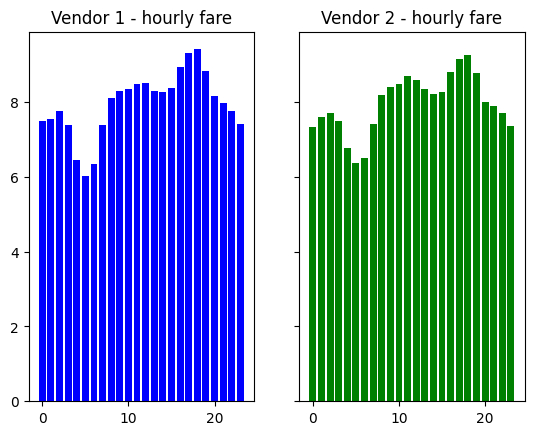

In [194]:
vendor_hourly_fare_v1 = vendor_hourly_fare[vendor_hourly_fare.VendorID == 1]
vendor_hourly_fare_v2 = vendor_hourly_fare[vendor_hourly_fare.VendorID == 2]
fig,ax = plt.subplots(ncols=2,sharey=True)
vendor1=ax[0].bar(vendor_hourly_fare_v1.tpep_pickup_hour, vendor_hourly_fare_v1.fare_per_mile,color='blue')
vendor2=ax[1].bar(vendor_hourly_fare_v2.tpep_pickup_hour, vendor_hourly_fare_v2.fare_per_mile,color='Green')
ax[0].set_title('Vendor 1 - hourly fare')
ax[1].set_title('Vendor 2 - hourly fare')

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [196]:
# Defining distance tiers
df['Tier']=df.trip_distance.apply(lambda x: "Tier1" if(x < 2) else ( "Tier2" if (x < 5)  else "Tier3"))

vendor_tier_fare = df.groupby(['VendorID','Tier']).agg(
    avg_amount=('total_amount', 'mean'),
    avg_distance=('trip_distance', 'mean')
)

vendor_tier_fare['fare_per_mile']=round((vendor_tier_fare.avg_amount)/(vendor_tier_fare.avg_distance),2)
vendor_tier_fare.reset_index(inplace=True)
vendor_tier_fare.head(10)


VendorID   Tier  avg_amount  avg_distance  fare_per_mile
0         1  Tier1   16.678712      1.119564          14.90
1         1  Tier2   26.660509      2.940580           9.07
2         1  Tier3   64.798671     11.387308           5.69
3         2  Tier1   17.280198      1.155874          14.95
4         2  Tier2   27.612023      2.988533           9.24
5         2  Tier3   68.955711     11.817314           5.84

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

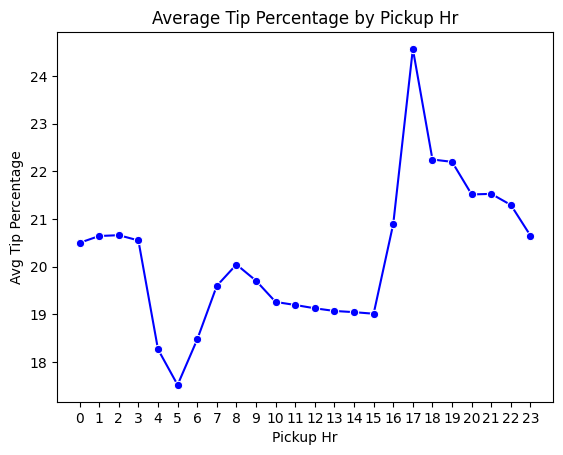

In [198]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_percentage']=round(100*(df.tip_amount/df.fare_amount),2)
avg_tip_hour = df.groupby('tpep_pickup_hour')['tip_percentage'].mean().reset_index()
sns.lineplot(data=avg_tip_hour, x='tpep_pickup_hour', y='tip_percentage', marker='o', color='blue')
plt.title('Average Tip Percentage by Pickup Hr')
plt.xlabel('Pickup Hr')
plt.ylabel('Avg Tip Percentage')
plt.xticks(range(0, 24))
plt.show()


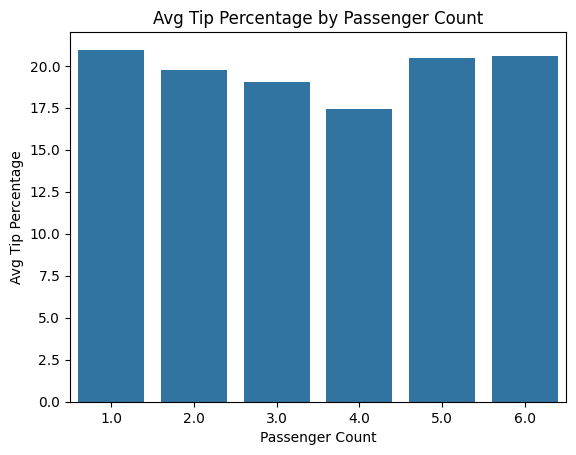

In [200]:
avg_tip_passenger_count = df.groupby(['passenger_count']).agg(
    tip_percentage=('tip_percentage', 'mean')
)
sns.barplot(data=avg_tip_passenger_count, x='passenger_count', y='tip_percentage')
plt.title('Avg Tip Percentage by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Avg Tip Percentage')
plt.show()

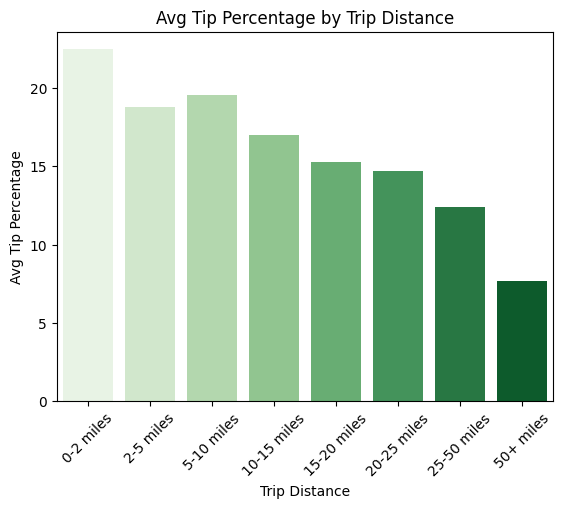

In [202]:
bins = [0, 2, 5, 10, 15, 20, 25, 50, 100]
labels = ['0-2 miles', '2-5 miles', '5-10 miles', '10-15 miles', '15-20 miles', '20-25 miles', '25-50 miles', '50+ miles']
df['distance_group'] = pd.cut(df['trip_distance'], bins=bins, labels=labels, right=False)

avg_tip_distance = df.groupby('distance_group')['tip_percentage'].mean().reset_index()
sns.barplot(data=avg_tip_distance, x='distance_group', y='tip_percentage', palette='Greens')
plt.title('Avg Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Avg Tip Percentage')
plt.xticks(rotation=45)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

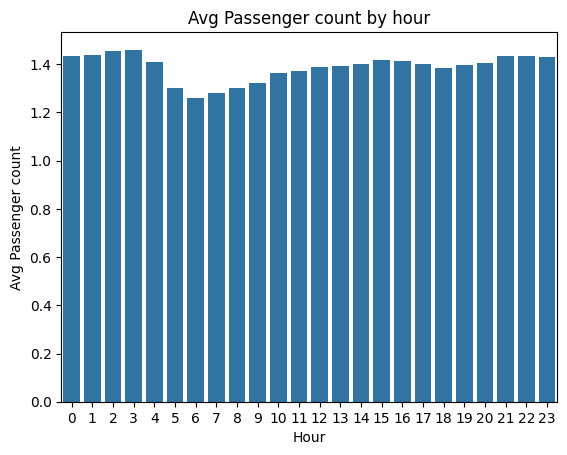

In [204]:
# See how passenger count varies across hours and days

passenger_count_hours = df.groupby(['tpep_pickup_hour']).agg(
    avg_passenger=('passenger_count', 'mean')
)

sns.barplot(data=passenger_count_hours, x='tpep_pickup_hour', y='avg_passenger')
plt.title('Avg Passenger count by hour')
plt.xlabel('Hour')
plt.ylabel('Avg Passenger count')
plt.show()



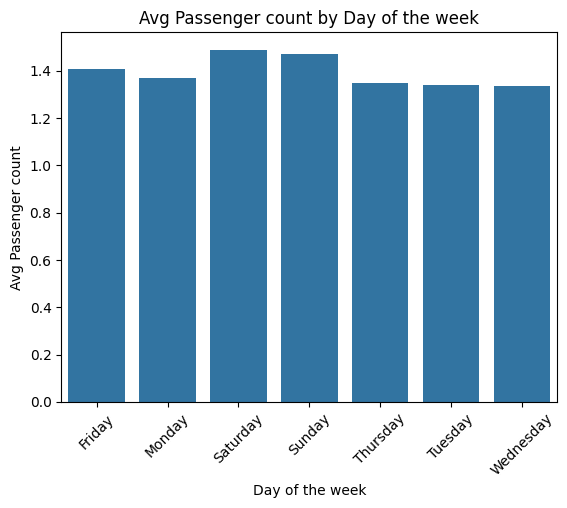

In [206]:
passenger_count_day = df.groupby(['tpep_pickup_dayofweek']).agg(
    avg_passenger=('passenger_count', 'mean')
)

sns.barplot(data=passenger_count_day, x='tpep_pickup_dayofweek', y='avg_passenger')
plt.title('Avg Passenger count by Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Avg Passenger count')
plt.xticks(rotation=45)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

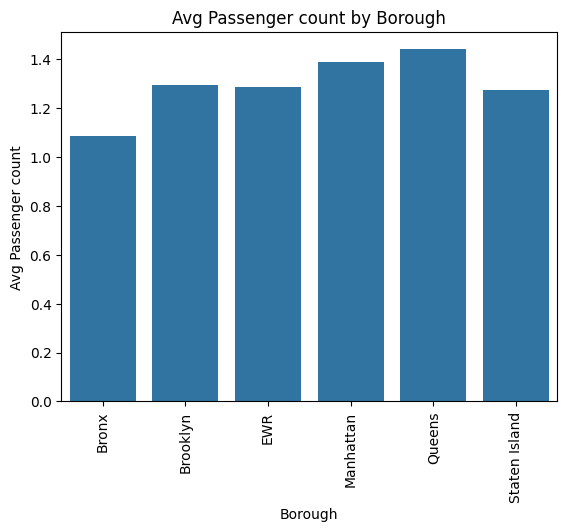

In [208]:
# How does passenger count vary across zones
borough_passenger_count = merged_df2.groupby(['borough_x']).agg(
    avg_passenger=('passenger_count', 'mean')
)
# Used borough as zones here, as zones have much large value set
sns.barplot(data=borough_passenger_count, x='borough_x', y='avg_passenger')
plt.title('Avg Passenger count by Borough')
plt.xlabel('Borough')
plt.ylabel('Avg Passenger count')
plt.xticks(rotation=90)
plt.show()


In [210]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
merged_df2['avg_pc_zone']=merged_df2.groupby('zone_x')['passenger_count'].transform('mean')


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [212]:
# How often is each surcharge applied?

print(f"Total Trips = {merged_df2.shape[0]}")
print(f"Total Trips with Extra charges = {(merged_df2[merged_df2.extra>0]).shape[0]}")
print(f"Total Trips with improvement surcharge = {(merged_df2[merged_df2.improvement_surcharge>0]).shape[0]}")
print(f"Total Trips with congestion surcharge = {(merged_df2[merged_df2.congestion_surcharge>0]).shape[0]}")


Total Trips = 1753329
Total Trips with Extra charges = 1083024
Total Trips with improvement surcharge = 1753299
Total Trips with congestion surcharge = 1637015


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Adaptive Zone-Based Dispatching
-Boost vehicle availability in high-demand areas such as Midtown during peak hours (5–7 PM).
-Reduce idle time in low-activity zones during off-peak periods.
-Leverage real-time pickup-to-drop off ratios to continuously rebalance fleet distribution between over- and under-served locations.

2. Time and Day-Based Resource Allocation
-Align driver incentives and shift schedules with observed demand patterns by hour and day.
-Increase coverage on Wednesdays and Thursdays, which show slightly elevated demand.
-Introduce standby-based shift models for low-traffic periods such as early mornings.
-Scale down fleet presence during consistently low-revenue hours to enhance cost-efficiency.

3. Proactive Positioning Using Demand Forecasting
-Use historical data to generate hourly demand heatmaps by zone.
-Pre-position taxis ahead of expected surges, particularly in financial and entertainment hubs during late evenings.
-Incorporate external factors such as events or weather into demand forecasting for smarter fleet placement.

4. Incentive Models for Off-Peak Efficiency
-Provide performance-based bonuses to encourage driver availability in off-peak hours and low-demand areas.
-Introduce dynamic pricing or shared ride options to improve cost recovery and service utilization during slower periods.

5. Customer-Centric Service Enhancements
-Enhance rider satisfaction through clean vehicles, courteous drivers, and loyalty reward programs.
-Promote tipping by improving the overall passenger experience.

6. Transparent Pricing and Surcharges
-Clearly communicate fare components and surcharges (e.g., congestion, airport fees) via receipts or in-app displays.
-Improve trust and reduce fare disputes by offering full pricing transparency.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Dynamically position cabs in zones with consistently high demand during peak hours, such as business districts in the mornings and entertainment areas in the evenings.
2. Adjust fleet presence by day of week, increasing availability midweek (e.g., Wednesdays and Thursdays) and scaling down on traditionally lower-demand days like Sundays.
3. Align seasonal deployment with monthly demand fluctuations, ensuring higher fleet readiness during busy periods (e.g., spring and fall), and reallocating resources during quieter months.
4. Implement data-driven zone targeting, where vehicle placement is guided by historical and forecasted pickup/drop-off patterns, maximizing fleet efficiency and customer wait-time reduction.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Implement Dynamic Pricing Based on Demand Patterns: Adopt a flexible fare structure that adjusts in real-time to reflect fluctuations in demand:
- Apply dynamic fare multipliers during: 
	-High-demand months (e.g., May and October)
	-Daily peak hours (e.g., 5–7 PM)
	-Event-based or weather-driven surges (e.g., concerts, storms)
- Utilize both historical trip data and live pickup density to automatically trigger rate adjustments in key zones.

2. Introduce Nighttime Fare Premiums: Enhance revenue during late hours by:
  -Applying a 10–15% nighttime surcharge for trips between 10 PM and 5 AM, especially from nightlife and transit-heavy areas.
  -Offering predictable flat fares for common nighttime destinations (e.g., airports, entertainment districts), improving both fairness and rider      confidence.

3. Encourage Digital Payments Through Incentives: Promote cashless transactions with small, targeted benefits:
  -Provide a \$1 or 2% discount for payments made via card or app.
  -Reduce cash handling, disputes, and friction at drop-off.
  -Optionally, roll out a loyalty program with points or credits (e.g., discount every 10th ride) to drive repeat digital engagement.

4. Offer Flat-Rate Fares for High-Traffic Routes: Enhance transparency and competitiveness with fixed pricing on key routes:
- Introduce flat fares for corridors such as:
	-JFK/LGA to/from Midtown/Downtown
	-Manhattan–Brooklyn and Manhattan–Queens
- Regularly benchmark and adjust these rates quarterly using internal fare data and competitor analysis to remain attractive yet profitable.

5. Optimize Fare Structure Using Distance-Based Tiers: 
- Refine per-mile pricing to strike a balance between affordability and profitability:
	0–2 miles: Base fare + minimal per-mile charge (incentivizes short trips)
	2–10 miles: Standard per-mile rate
	10+ miles: Slight per-mile discount to make long trips more appealing
- This tiered structure supports fair pricing, improves fleet utilization, and encourages longer, higher-value trips.